# Importações

In [ ]:
!pip install PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':"1-0VizjwKWtoFFB9ole5kz8VnhFduv28l"}) # replace the id with id of file you want to access
downloaded.GetContentFile('supernovas_bg_u.csv')        # replace the file name with your file

downloaded = drive.CreateFile({'id':"1qsDQ5wZw5JKtVOny8XjaSCGTTs0HnBVM"}) # replace the id with id of file you want to access
downloaded.GetContentFile('supernovas_bg_r_i.csv')        # replace the file name with your file


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import re

#pd.set_option("display.max_rows", None, "display.max_columns", None)

In [ ]:
base = pd.read_csv('supernovas_bg_u.csv')
base = base.drop(['Unnamed: 0'],axis=1)
mags_BG_U=[]
for i in range(len(base.mags_BG)):
  mags_BG_U.append(eval(base.mags_BG[i]) + eval(base.mags_U[i]))
base = pd.concat([base, pd.Series(mags_BG_U)], axis=1)
base = base.rename(columns={0: 'mags_BG_U'})
base 
# vamos usar a ultima coluna, que tem as informações de magnitude BG e magnitude U juntas

,nomes,tipos,mags_BG,mags_U,mags_BG_U
0,ASASSN-14bd,Ia,"[1.0581521739130435, 1.0472826086956522, 1.040...","[1.0342995169082128, 1.0030797101449276, 1.000...","[1.0581521739130435, 1.0472826086956522, 1.040..."
1,ASASSN-14lp,Ia,"[1.0316010058675609, 1.0209555741827325, 1.026...","[1.0556747694886839, 1.0808885163453479, 1.058...","[1.0316010058675609, 1.0209555741827325, 1.026..."
2,CSS140914:010107-101840,Ia,"[1.272233932630709, 1.0623372597644143, 1.0401...","[1.0595784252944824, 1.018908865468072, 1.0015...","[1.272233932630709, 1.0623372597644143, 1.0401..."
3,Gaia15agh,Ia,"[1.0230995875073658, 1.0285346690237676, 1.036...","[1.092737183264585, 1.1154213317619328, 1.1330...","[1.0230995875073658, 1.0285346690237676, 1.036..."
4,LSQ11ot,Ia,"[1.0351217228464418, 1.0366783707865168, 1.046...","[1.0843258426966293, 1.076505617977528, 1.0995...","[1.0351217228464418, 1.0366783707865168, 1.046..."
...,...,...,...,...,...
344,SN2016coi,Ic BL,"[1.0903841387856257, 1.0918066914498143, 1.090...","[1.0925898389095414, 1.1158736059479555, 1.139...","[1.0903841387856257, 1.0918066914498143, 1.090..."
345,SN2017egm,SLSN-I,"[1.1579420556714561, 1.1439178943069561, 1.137...","[1.0519683411837373, 1.0421061212278988, 1.037...","[1.1579420556714561, 1.1439178943069561, 1.137..."
346,iPTF13dge,Ia,"[1.0671968190854872, 1.0369532803180916, 1.024...","[1.0525734481996907, 1.018316766070245, 1.0127...","[1.0671968190854872, 1.0369532803180916, 1.024..."
347,iPTF13ebh,Ia,"[1.0978705118411, 1.0440931372549018, 1.022496...","[1.0990641711229947, 1.0563836898395722, 1.070...","[1.0978705118411, 1.0440931372549018, 1.022496..."


# Bandas B+G e U

# Random Forest (3 classes: II, Ia, outros) test_size = 50%

In [ ]:
#dividindo os dados em previsores e classe

tipos = []
for i in range(len(base.tipos)):
  if base.tipos[i] == 'II':
    tipos.append('II')
  if base.tipos[i] == 'Ia':
    tipos.append('Ia')
  if base.tipos[i] != 'II' and base.tipos[i] != 'Ia':
    tipos.append('outros')
tipos = pd.Series(tipos)

previsores=[]
for i in range(349):
  previsores.append(np.array(base.iloc[:,4][i]))
previsores = np.asarray(previsores)
classe = tipos

#divide os dados em previsores de teste e treino, e classes de teste e treino
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.50,random_state=1)

#configura o classificador
classificador = RandomForestClassifier(n_estimators=100, criterion='entropy')

#gera a random forest usando os valores das variáveis "previsores_treinamento" e "classe_treinamento" aplicados à função "RandomForestClassifier"
#(treina o algoritmo)
classificador.fit(previsores_treinamento, classe_treinamento)

#baseado na árvore de decisão, faz as classificações dos registros da variável "previsores_teste"
previsoes = classificador.predict(previsores_teste)

#calcula a precisão das classificações (compara as classificações da
#random forest com as classificações reais)
precisao = accuracy_score(classe_teste, previsoes)

#gera a matriz de confusão
matriz = confusion_matrix(classe_teste, previsoes)

precisao_randomforest_3_50 = precisao
matriz_randomforest_3_50 = matriz
print(precisao)
print(matriz)

0.6114285714285714
[[85 13  3]
 [37 17  2]
 [12  1  5]]


# Random Forest (2 classes: II, outros) test_size = 50%

In [ ]:
#dividindo os dados em previsores e classe

tipos = []
for i in range(len(base.tipos)):
  if base.tipos[i] == 'II':
    tipos.append('II')
  if base.tipos[i] != 'II':
    tipos.append('outros')
tipos = pd.Series(tipos)

previsores=[]
for i in range(349):
  previsores.append(np.array(base.iloc[:,4][i]))
previsores = np.asarray(previsores)
classe = tipos

#divide os dados em previsores de teste e treino, e classes de teste e treino
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.50,random_state=1)

#configura o classificador
classificador = RandomForestClassifier(n_estimators=100, criterion='entropy')

#gera a random forest usando os valores das variáveis "previsores_treinamento" e "classe_treinamento" aplicados à função "RandomForestClassifier"
#(treina o algoritmo)
classificador.fit(previsores_treinamento, classe_treinamento)

#baseado na árvore de decisão, faz as classificações dos registros da variável "previsores_teste"
previsoes = classificador.predict(previsores_teste)

#calcula a precisão das classificações (compara as classificações da
#random forest com as classificações reais)
precisao = accuracy_score(classe_teste, previsoes)

#gera a matriz de confusão
matriz = confusion_matrix(classe_teste, previsoes)

precisao_randomforest_2_50 = precisao
matriz_randomforest_2_50 = matriz
print(precisao)
print(matriz)

0.6342857142857142
[[80 21]
 [43 31]]


# KNN (3 classes: II, Ia, outros) test_size = 50%

In [ ]:
#dividindo os dados em previsores e classe

tipos = []
for i in range(len(base.tipos)):
  if base.tipos[i] == 'II':
    tipos.append('II')
  if base.tipos[i] == 'Ia':
    tipos.append('Ia')
  if base.tipos[i] != 'II' and base.tipos[i] != 'Ia':
    tipos.append('outros')
tipos = pd.Series(tipos)

previsores=[]
for i in range(349):
  previsores.append(np.array(base.iloc[:,4][i]))
previsores = np.asarray(previsores)
classe = tipos

#divide os dados em previsores de teste e treino, e classes de teste e treino
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.50,random_state=1)

#criando o classificador KNN com o numero 5 de vizinhos, utilizando a distancia euclidiana padrao (minkowski p=2)
classificador = KNeighborsClassifier(n_neighbors=8, metric='minkowski', p = 2)


#(treina o algoritmo)
classificador.fit(previsores_treinamento, classe_treinamento)

#baseado na árvore de decisão, faz as classificações dos registros da variável "previsores_teste"
previsoes = classificador.predict(previsores_teste)

#calcula a precisão das classificações (compara as classificações da
#random forest com as classificações reais)
precisao = accuracy_score(classe_teste, previsoes)

#gera a matriz de confusão
matriz = confusion_matrix(classe_teste, previsoes)

precisao_knn_3_50 = precisao
matriz_knn_3_50 = matriz
print(precisao)
print(matriz)

0.6342857142857142
[[88 11  2]
 [33 20  3]
 [15  0  3]]


# KNN (2 classes: II, outros) test_size = 50%

In [ ]:
tipos = []
for i in range(len(base.tipos)):
  if base.tipos[i] == 'II':
    tipos.append('II')
  if base.tipos[i] != 'II':
    tipos.append('outros')
tipos = pd.Series(tipos)

previsores=[]
for i in range(349):
  previsores.append(np.array(base.iloc[:,4][i]))
previsores = np.asarray(previsores)
classe = tipos

#divide os dados em previsores de teste e treino, e classes de teste e treino
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.50,random_state=1)

#criando o classificador KNN com o numero 5 de vizinhos, utilizando a distancia euclidiana padrao (minkowski p=2)
classificador = KNeighborsClassifier(n_neighbors=8, metric='minkowski', p = 2)


#(treina o algoritmo)
classificador.fit(previsores_treinamento, classe_treinamento)

#baseado na árvore de decisão, faz as classificações dos registros da variável "previsores_teste"
previsoes = classificador.predict(previsores_teste)

#calcula a precisão das classificações (compara as classificações da
#random forest com as classificações reais)
precisao = accuracy_score(classe_teste, previsoes)

#gera a matriz de confusão
matriz = confusion_matrix(classe_teste, previsoes)

precisao_knn_2_50 = precisao
matriz_knn_2_50 = matriz
print(precisao)
print(matriz)

0.6857142857142857
[[87 14]
 [41 33]]


# SVM (3 classes: II, Ia, outros) test_size = 50%

In [ ]:
#dividindo os dados em previsores e classe

tipos = []
for i in range(len(base.tipos)):
  if base.tipos[i] == 'II':
    tipos.append('II')
  if base.tipos[i] == 'Ia':
    tipos.append('Ia')
  if base.tipos[i] != 'II' and base.tipos[i] != 'Ia':
    tipos.append('outros')
tipos = pd.Series(tipos)

previsores=[]
for i in range(349):
  previsores.append(np.array(base.iloc[:,4][i]))
previsores = np.asarray(previsores)
classe = tipos

#divide os dados em previsores de teste e treino, e classes de teste e treino
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.50,random_state=1)

#criando o classificador
#C: custo / nível de perfeição na análise (default=1)
#kernel rbf é o gaussiano
classificador = SVC(kernel = 'poly', gamma='scale')


#(treina o algoritmo)
classificador.fit(previsores_treinamento, classe_treinamento)

#baseado na árvore de decisão, faz as classificações dos registros da variável "previsores_teste"
previsoes = classificador.predict(previsores_teste)

#calcula a precisão das classificações (compara as classificações da
#random forest com as classificações reais)
precisao = accuracy_score(classe_teste, previsoes)

#gera a matriz de confusão
matriz = confusion_matrix(classe_teste, previsoes)

precisao_svm_3_50 = precisao
matriz_svm_3_50 = matriz
print(precisao)
print(matriz)

0.6057142857142858
[[93  4  4]
 [50  5  1]
 [10  0  8]]


# SVM (2 classes: II, outros) test_size = 50%

In [ ]:
tipos = []
for i in range(len(base.tipos)):
  if base.tipos[i] == 'II':
    tipos.append('II')
  if base.tipos[i] != 'II':
    tipos.append('outros')
tipos = pd.Series(tipos)

previsores=[]
for i in range(349):
  previsores.append(np.array(base.iloc[:,4][i]))
previsores = np.asarray(previsores)
classe = tipos

#divide os dados em previsores de teste e treino, e classes de teste e treino
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.50,random_state=1)

#criando o classificador
#C: custo / nível de perfeição na análise (default=1)
#kernel rbf é o gaussiano
classificador = SVC(kernel = 'poly', gamma='scale')


#(treina o algoritmo)
classificador.fit(previsores_treinamento, classe_treinamento)

#baseado na árvore de decisão, faz as classificações dos registros da variável "previsores_teste"
previsoes = classificador.predict(previsores_teste)

#calcula a precisão das classificações (compara as classificações da
#random forest com as classificações reais)
precisao = accuracy_score(classe_teste, previsoes)

#gera a matriz de confusão
matriz = confusion_matrix(classe_teste, previsoes)

precisao_svm_2_50 = precisao
matriz_svm_2_50 = matriz
print(precisao)
print(matriz)

0.6057142857142858
[[85 16]
 [53 21]]


# Redes Neurais (3 classes: II, Ia, outros) test_size = 50%

In [ ]:
#dividindo os dados em previsores e classe

tipos = []
for i in range(len(base.tipos)):
  if base.tipos[i] == 'II':
    tipos.append('II')
  if base.tipos[i] == 'Ia':
    tipos.append('Ia')
  if base.tipos[i] != 'II' and base.tipos[i] != 'Ia':
    tipos.append('outros')
tipos = pd.Series(tipos)

previsores=[]
for i in range(349):
  previsores.append(np.array(base.iloc[:,4][i]))
previsores = np.asarray(previsores)
classe = tipos

#divide os dados em previsores de teste e treino, e classes de teste e treino
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.50,random_state=1)

#atribui à variável "classificador" a função MLPClassifier
#essa função irá gerar a rede neural de várias camadas
classificador = MLPClassifier(verbose = False, #exibe o erro ao longo das iterações
                              max_iter=1000, #determina o número de iterações
                              tol = 0.0000010, #valor mínimo pelo o qual o erro deve diminuir. Caso não consiga, interrompe as iterações
                              solver = 'lbfgs', #algoritmo usado para a otimização dos pesos
                              hidden_layer_sizes=(100,), #(4,2,),(100,70)=1 camada oculta com 100 neurônios e outra com 70
                              activation='relu') #função de ativação


#(treina o algoritmo)
classificador.fit(previsores_treinamento, classe_treinamento)

#baseado na árvore de decisão, faz as classificações dos registros da variável "previsores_teste"
previsoes = classificador.predict(previsores_teste)

#calcula a precisão das classificações (compara as classificações da
#random forest com as classificações reais)
precisao = accuracy_score(classe_teste, previsoes)

#gera a matriz de confusão
matriz = confusion_matrix(classe_teste, previsoes)

precisao_redesneurais_3_50 = precisao
matriz_redesneurais_3_50 = matriz
print(precisao)
print(matriz)

0.6628571428571428
[[74 24  3]
 [20 33  3]
 [ 8  1  9]]


# Redes Neurais (2 classes: II, outros) test_size = 50%

In [ ]:
tipos = []
for i in range(len(base.tipos)):
  if base.tipos[i] == 'II':
    tipos.append('II')
  if base.tipos[i] != 'II':
    tipos.append('outros')
tipos = pd.Series(tipos)

previsores=[]
for i in range(349):
  previsores.append(np.array(base.iloc[:,4][i]))
previsores = np.asarray(previsores)
classe = tipos

#divide os dados em previsores de teste e treino, e classes de teste e treino
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.50,random_state=1)

#atribui à variável "classificador" a função MLPClassifier
#essa função irá gerar a rede neural de várias camadas
classificador = MLPClassifier(verbose = False, #exibe o erro ao longo das iterações
                              max_iter=1000, #determina o número de iterações
                              tol = 0.0000010, #valor mínimo pelo o qual o erro deve diminuir. Caso não consiga, interrompe as iterações
                              solver = 'lbfgs', #algoritmo usado para a otimização dos pesos
                              hidden_layer_sizes=(100,), #(4,2,),(100,70)=1 camada oculta com 100 neurônios e outra com 70
                              activation='relu') #função de ativação

                              
#(treina o algoritmo)
classificador.fit(previsores_treinamento, classe_treinamento)

#baseado na árvore de decisão, faz as classificações dos registros da variável "previsores_teste"
previsoes = classificador.predict(previsores_teste)

#calcula a precisão das classificações (compara as classificações da
#random forest com as classificações reais)
precisao = accuracy_score(classe_teste, previsoes)

#gera a matriz de confusão
matriz = confusion_matrix(classe_teste, previsoes)

precisao_redesneurais_2_50 = precisao
matriz_redesneurais_2_50 = matriz
print(precisao)
print(matriz)

0.5714285714285714
[[73 28]
 [47 27]]


In [ ]:
##############################################################

# Random Forest (3 classes: II, Ia, outros) test_size = 40%

In [ ]:
#dividindo os dados em previsores e classe

tipos = []
for i in range(len(base.tipos)):
  if base.tipos[i] == 'II':
    tipos.append('II')
  if base.tipos[i] == 'Ia':
    tipos.append('Ia')
  if base.tipos[i] != 'II' and base.tipos[i] != 'Ia':
    tipos.append('outros')
tipos = pd.Series(tipos)

previsores=[]
for i in range(349):
  previsores.append(np.array(base.iloc[:,4][i]))
previsores = np.asarray(previsores)
classe = tipos

#divide os dados em previsores de teste e treino, e classes de teste e treino
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.40,random_state=1)

#configura o classificador
classificador = RandomForestClassifier(n_estimators=100, criterion='entropy')

#gera a random forest usando os valores das variáveis "previsores_treinamento" e "classe_treinamento" aplicados à função "RandomForestClassifier"
#(treina o algoritmo)
classificador.fit(previsores_treinamento, classe_treinamento)

#baseado na árvore de decisão, faz as classificações dos registros da variável "previsores_teste"
previsoes = classificador.predict(previsores_teste)

#calcula a precisão das classificações (compara as classificações da
#random forest com as classificações reais)
precisao = accuracy_score(classe_teste, previsoes)

#gera a matriz de confusão
matriz = confusion_matrix(classe_teste, previsoes)

precisao_randomforest_3_40 = precisao
matriz_randomforest_3_40 = matriz
print(precisao)
print(matriz)

0.6142857142857143
[[70  5  2]
 [33 13  2]
 [11  1  3]]


# Random Forest (2 classes: II, outros) test_size = 40%

In [ ]:
#dividindo os dados em previsores e classe

tipos = []
for i in range(len(base.tipos)):
  if base.tipos[i] == 'II':
    tipos.append('II')
  if base.tipos[i] != 'II':
    tipos.append('outros')
tipos = pd.Series(tipos)

previsores=[]
for i in range(349):
  previsores.append(np.array(base.iloc[:,4][i]))
previsores = np.asarray(previsores)
classe = tipos

#divide os dados em previsores de teste e treino, e classes de teste e treino
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.40,random_state=1)

#configura o classificador
classificador = RandomForestClassifier(n_estimators=100, criterion='entropy')

#gera a random forest usando os valores das variáveis "previsores_treinamento" e "classe_treinamento" aplicados à função "RandomForestClassifier"
#(treina o algoritmo)
classificador.fit(previsores_treinamento, classe_treinamento)

#baseado na árvore de decisão, faz as classificações dos registros da variável "previsores_teste"
previsoes = classificador.predict(previsores_teste)

#calcula a precisão das classificações (compara as classificações da
#random forest com as classificações reais)
precisao = accuracy_score(classe_teste, previsoes)

#gera a matriz de confusão
matriz = confusion_matrix(classe_teste, previsoes)

precisao_randomforest_2_40 = precisao
matriz_randomforest_2_40 = matriz
print(precisao)
print(matriz)

0.6714285714285714
[[68  9]
 [37 26]]


# KNN (3 classes: II, Ia, outros) test_size = 40%

In [ ]:
#dividindo os dados em previsores e classe

tipos = []
for i in range(len(base.tipos)):
  if base.tipos[i] == 'II':
    tipos.append('II')
  if base.tipos[i] == 'Ia':
    tipos.append('Ia')
  if base.tipos[i] != 'II' and base.tipos[i] != 'Ia':
    tipos.append('outros')
tipos = pd.Series(tipos)

previsores=[]
for i in range(349):
  previsores.append(np.array(base.iloc[:,4][i]))
previsores = np.asarray(previsores)
classe = tipos

#divide os dados em previsores de teste e treino, e classes de teste e treino
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.40,random_state=1)

#criando o classificador KNN com o numero 5 de vizinhos, utilizando a distancia euclidiana padrao (minkowski p=2)
classificador = KNeighborsClassifier(n_neighbors=8, metric='minkowski', p = 2)


#(treina o algoritmo)
classificador.fit(previsores_treinamento, classe_treinamento)

#baseado na árvore de decisão, faz as classificações dos registros da variável "previsores_teste"
previsoes = classificador.predict(previsores_teste)

#calcula a precisão das classificações (compara as classificações da
#random forest com as classificações reais)
precisao = accuracy_score(classe_teste, previsoes)

#gera a matriz de confusão
matriz = confusion_matrix(classe_teste, previsoes)

precisao_knn_3_40 = precisao
matriz_knn_3_40 = matriz
print(precisao)
print(matriz)

0.6285714285714286
[[68  7  2]
 [28 15  5]
 [ 9  1  5]]


# KNN (2 classes: II, outros) test_size = 40%

In [ ]:
tipos = []
for i in range(len(base.tipos)):
  if base.tipos[i] == 'II':
    tipos.append('II')
  if base.tipos[i] != 'II':
    tipos.append('outros')
tipos = pd.Series(tipos)

previsores=[]
for i in range(349):
  previsores.append(np.array(base.iloc[:,4][i]))
previsores = np.asarray(previsores)
classe = tipos

#divide os dados em previsores de teste e treino, e classes de teste e treino
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.40,random_state=1)

#criando o classificador KNN com o numero 5 de vizinhos, utilizando a distancia euclidiana padrao (minkowski p=2)
classificador = KNeighborsClassifier(n_neighbors=8, metric='minkowski', p = 2)


#(treina o algoritmo)
classificador.fit(previsores_treinamento, classe_treinamento)

#baseado na árvore de decisão, faz as classificações dos registros da variável "previsores_teste"
previsoes = classificador.predict(previsores_teste)

#calcula a precisão das classificações (compara as classificações da
#random forest com as classificações reais)
precisao = accuracy_score(classe_teste, previsoes)

#gera a matriz de confusão
matriz = confusion_matrix(classe_teste, previsoes)

precisao_knn_2_40 = precisao
matriz_knn_2_40 = matriz
print(precisao)
print(matriz)

0.6928571428571428
[[68  9]
 [34 29]]


# SVM (3 classes: II, Ia, outros) test_size = 40%

In [ ]:
#dividindo os dados em previsores e classe

tipos = []
for i in range(len(base.tipos)):
  if base.tipos[i] == 'II':
    tipos.append('II')
  if base.tipos[i] == 'Ia':
    tipos.append('Ia')
  if base.tipos[i] != 'II' and base.tipos[i] != 'Ia':
    tipos.append('outros')
tipos = pd.Series(tipos)

previsores=[]
for i in range(349):
  previsores.append(np.array(base.iloc[:,4][i]))
previsores = np.asarray(previsores)
classe = tipos

#divide os dados em previsores de teste e treino, e classes de teste e treino
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.40,random_state=1)

#criando o classificador
#C: custo / nível de perfeição na análise (default=1)
#kernel rbf é o gaussiano
classificador = SVC(kernel = 'poly', gamma='scale')


#(treina o algoritmo)
classificador.fit(previsores_treinamento, classe_treinamento)

#baseado na árvore de decisão, faz as classificações dos registros da variável "previsores_teste"
previsoes = classificador.predict(previsores_teste)

#calcula a precisão das classificações (compara as classificações da
#random forest com as classificações reais)
precisao = accuracy_score(classe_teste, previsoes)

#gera a matriz de confusão
matriz = confusion_matrix(classe_teste, previsoes)

precisao_svm_3_40 = precisao
matriz_svm_3_40 = matriz
print(precisao)
print(matriz)

0.5714285714285714
[[73  3  1]
 [44  2  2]
 [10  0  5]]


# SVM (2 classes: II, outros) test_size = 40%

In [ ]:
tipos = []
for i in range(len(base.tipos)):
  if base.tipos[i] == 'II':
    tipos.append('II')
  if base.tipos[i] != 'II':
    tipos.append('outros')
tipos = pd.Series(tipos)

previsores=[]
for i in range(349):
  previsores.append(np.array(base.iloc[:,4][i]))
previsores = np.asarray(previsores)
classe = tipos

#divide os dados em previsores de teste e treino, e classes de teste e treino
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.40,random_state=1)

#criando o classificador
#C: custo / nível de perfeição na análise (default=1)
#kernel rbf é o gaussiano
classificador = SVC(kernel = 'poly', gamma='scale')


#(treina o algoritmo)
classificador.fit(previsores_treinamento, classe_treinamento)

#baseado na árvore de decisão, faz as classificações dos registros da variável "previsores_teste"
previsoes = classificador.predict(previsores_teste)

#calcula a precisão das classificações (compara as classificações da
#random forest com as classificações reais)
precisao = accuracy_score(classe_teste, previsoes)

#gera a matriz de confusão
matriz = confusion_matrix(classe_teste, previsoes)

precisao_svm_2_40 = precisao
matriz_svm_2_40 = matriz
print(precisao)
print(matriz)

0.6357142857142857
[[69  8]
 [43 20]]


# Redes Neurais (3 classes: II, Ia, outros) test_size = 40%

In [ ]:
#dividindo os dados em previsores e classe

tipos = []
for i in range(len(base.tipos)):
  if base.tipos[i] == 'II':
    tipos.append('II')
  if base.tipos[i] == 'Ia':
    tipos.append('Ia')
  if base.tipos[i] != 'II' and base.tipos[i] != 'Ia':
    tipos.append('outros')
tipos = pd.Series(tipos)

previsores=[]
for i in range(349):
  previsores.append(np.array(base.iloc[:,4][i]))
previsores = np.asarray(previsores)
classe = tipos

#divide os dados em previsores de teste e treino, e classes de teste e treino
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.40,random_state=1)

#atribui à variável "classificador" a função MLPClassifier
#essa função irá gerar a rede neural de várias camadas
classificador = MLPClassifier(verbose = False, #exibe o erro ao longo das iterações
                              max_iter=1000, #determina o número de iterações
                              tol = 0.0000010, #valor mínimo pelo o qual o erro deve diminuir. Caso não consiga, interrompe as iterações
                              solver = 'lbfgs', #algoritmo usado para a otimização dos pesos
                              hidden_layer_sizes=(100,), #(4,2,),(100,70)=1 camada oculta com 100 neurônios e outra com 70
                              activation='relu') #função de ativação


#(treina o algoritmo)
classificador.fit(previsores_treinamento, classe_treinamento)

#baseado na árvore de decisão, faz as classificações dos registros da variável "previsores_teste"
previsoes = classificador.predict(previsores_teste)

#calcula a precisão das classificações (compara as classificações da
#random forest com as classificações reais)
precisao = accuracy_score(classe_teste, previsoes)

#gera a matriz de confusão
matriz = confusion_matrix(classe_teste, previsoes)

precisao_redesneurais_3_40 = precisao
matriz_redesneurais_3_40 = matriz
print(precisao)
print(matriz)

0.5642857142857143
[[58 16  3]
 [27 20  1]
 [13  1  1]]


# Redes Neurais (2 classes: II, outros) test_size = 40%

In [ ]:
tipos = []
for i in range(len(base.tipos)):
  if base.tipos[i] == 'II':
    tipos.append('II')
  if base.tipos[i] != 'II':
    tipos.append('outros')
tipos = pd.Series(tipos)

previsores=[]
for i in range(349):
  previsores.append(np.array(base.iloc[:,4][i]))
previsores = np.asarray(previsores)
classe = tipos

#divide os dados em previsores de teste e treino, e classes de teste e treino
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.40,random_state=1)

#atribui à variável "classificador" a função MLPClassifier
#essa função irá gerar a rede neural de várias camadas
classificador = MLPClassifier(verbose = False, #exibe o erro ao longo das iterações
                              max_iter=1000, #determina o número de iterações
                              tol = 0.0000010, #valor mínimo pelo o qual o erro deve diminuir. Caso não consiga, interrompe as iterações
                              solver = 'lbfgs', #algoritmo usado para a otimização dos pesos
                              hidden_layer_sizes=(100,), #(4,2,),(100,70)=1 camada oculta com 100 neurônios e outra com 70
                              activation='relu') #função de ativação

                              
#(treina o algoritmo)
classificador.fit(previsores_treinamento, classe_treinamento)

#baseado na árvore de decisão, faz as classificações dos registros da variável "previsores_teste"
previsoes = classificador.predict(previsores_teste)

#calcula a precisão das classificações (compara as classificações da
#random forest com as classificações reais)
precisao = accuracy_score(classe_teste, previsoes)

#gera a matriz de confusão
matriz = confusion_matrix(classe_teste, previsoes)

precisao_redesneurais_2_40 = precisao
matriz_redesneurais_2_40 = matriz
print(precisao)
print(matriz)

0.6928571428571428
[[60 17]
 [26 37]]


# Gráfico das bandas B+G e U comparando a precisão de cada classificador com 2 e 3 classes e com test_size de 50% e 40%

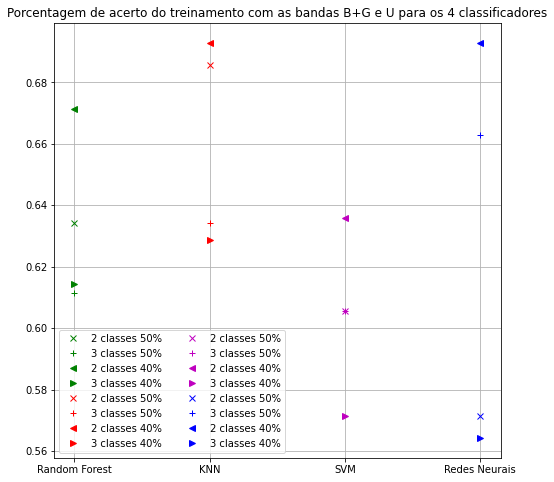

In [119]:
plt.figure(figsize=(8,8))

plt.plot("Random Forest",precisao_randomforest_2_50,'gx',label='2 classes 50%')
plt.plot("Random Forest",precisao_randomforest_3_50,'g+',label='3 classes 50%')
plt.plot("Random Forest",precisao_randomforest_2_40,'g<',label='2 classes 40%')
plt.plot("Random Forest",precisao_randomforest_3_40,'g>',label='3 classes 40%')
plt.plot("KNN",precisao_knn_2_50,'rx',label='2 classes 50%')
plt.plot("KNN",precisao_knn_3_50,'r+',label='3 classes 50%')
plt.plot("KNN",precisao_knn_2_40,'r<',label='2 classes 40%')
plt.plot("KNN",precisao_knn_3_40,'r>',label='3 classes 40%')
plt.plot("SVM",precisao_svm_2_50,'mx',label='2 classes 50%')
plt.plot("SVM",precisao_svm_3_50,'m+',label='3 classes 50%')
plt.plot("SVM",precisao_svm_2_40,'m<',label='2 classes 40%')
plt.plot("SVM",precisao_svm_3_40,'m>',label='3 classes 40%')
plt.plot("Redes Neurais",precisao_redesneurais_2_50,'bx',label='2 classes 50%')
plt.plot("Redes Neurais",precisao_redesneurais_3_50,'b+',label='3 classes 50%')
plt.plot("Redes Neurais",precisao_redesneurais_2_40,'b<',label='2 classes 40%')
plt.plot("Redes Neurais",precisao_redesneurais_3_40,'b>',label='3 classes 40%')
plt.title("Porcentagem de acerto do treinamento com as bandas B+G e U para os 4 classificadores")
plt.grid()
plt.legend(ncol=2)
plt.savefig("bandas_BG_U.png")
plt.show()

--------------------------------------------------------------------------------
# Bandas B+G, R e I

In [ ]:
# função que retira os valores de magnitude de dentro das listas, para facilitar a execução do treinamento

def read_csv(arquivo2_string):
    #para bandas g,r,i
    base = pd.read_csv(arquivo2_string)
    for i, value in enumerate(base['mags_I']):
        if base['mags_I'][i][1]==' ':
                base['mags_I'][i] = re.sub(' ','',base['mags_I'][i], 1)
        base['mags_I'][i] = base['mags_I'][i].replace("[", "")
        base['mags_I'][i] = eval(base['mags_I'][i].replace("]", ""))
    for i, value in enumerate(base['mags_BG']):
        if base['mags_BG'][i][1]==' ':
                base['mags_BG'][i] = re.sub(' ','',base['mags_BG'][i], 1)
        base['mags_BG'][i] = base['mags_BG'][i].replace("[", "")
        base['mags_BG'][i] = eval(base['mags_BG'][i].replace("]", ""))
    for i, value in enumerate(base['mags_R']):
        if base['mags_R'][i][1]==' ':
                base['mags_R'][i] = re.sub(' ','',base['mags_R'][i], 1)
        base['mags_R'][i] = base['mags_R'][i].replace("[", "")
        base['mags_R'][i] = eval(base['mags_R'][i].replace("]", ""))
    return base

In [ ]:
# base de dados bandas BG, R, I
base = read_csv("supernovas_bg_r_i.csv")
base = base.drop(['Unnamed: 0'],axis=1)
base

,nomes,tipos,mags_BG,mags_R,mags_I
0,ASASSN-14lp,Ia,"(1.0316010058675609, 1.0209555741827325, 1.026...","(1.0481512526776566, 1.0476110645431687, 1.056...","(1.0481512526776566, 1.0476110645431687, 1.056..."
1,Gaia15agh,Ia,"(1.0230995875073658, 1.0285346690237676, 1.036...","(1.0777725397760756, 1.0799882144961699, 1.004...","(1.0777725397760756, 1.0799882144961699, 1.004..."
2,Gaia16aam,Candidate,"(1.2096367650010036, 1.2113786875376278, 1.191...","(1.0371282360024083, 1.0964940798715634, 1.042...","(1.0371282360024083, 1.0964940798715634, 1.042..."
3,LSQ11ot,Ia,"(1.0351217228464418, 1.0366783707865168, 1.046...","(1.0137265917602993, 1.0170786516853931, 1.023...","(1.0137265917602993, 1.0170786516853931, 1.023..."
4,LSQ12gdj,Ia,"(1.10351911736732, 1.0785861275874593, 1.06433...","(1.1306524633821573, 1.1103565616215418, 1.103...","(1.1306524633821573, 1.1103565616215418, 1.103..."
...,...,...,...,...,...
460,SN2018hde,II P,"(1.0393073117097307, 1.045079714128642, 1.0471...","(1.0184167124793841, 1.0073300348176653, 1.003...","(1.0184167124793841, 1.0073300348176653, 1.003..."
461,SNhunt151,LBV to IIn,"(1.2199868073878626, 1.2302110817941951, 1.235...","(1.1273087071240104, 1.132585751978892, 1.1299...","(1.1273087071240104, 1.132585751978892, 1.1299..."
462,iPTF13bvn,Ib,"(1.0674822804314328, 1.0640290556900727, 1.079...","(1.036942372881356, 1.0244406779661017, 1.0186...","(1.036942372881356, 1.0244406779661017, 1.0186..."
463,iPTF13dge,Ia,"(1.0671968190854872, 1.0369532803180916, 1.024...","(1.0563286944996688, 1.0304837640821736, 1.031...","(1.0563286944996688, 1.0304837640821736, 1.031..."


# Redes Neurais (3 classes: II, Ia, outros) test_size = 50%
# Bandas 2 a 2 (BG + R) (BG + I) (R+I)

In [ ]:
#junta os valores de 'mags_BG' e 'mags_R' de uma dada supernova num único array e salva-os na variável 'previsores1'
previsores1 = np.asarray(base.iloc[:,2:4])
previsores1 = np.array([np.append(previsores1[:,0][i],previsores1[:,1][i]) for i in range(len(base))])

#junta os valores de 'mags_BG' e 'mags_I' de uma dada supernova num único array e salva-os na variável 'previsores2'
previsores2 = np.asarray(base.iloc[:,[2,4]])
previsores2 = np.array([np.append(previsores2[:,0][i],previsores2[:,1][i]) for i in range(len(base))])

#junta os valores de 'mags_R' e 'mags_I' de uma dada supernova num único array e salva-os na variável 'previsores3'
previsores3 = np.asarray(base.iloc[:,[3,4]])
previsores3 = np.array([np.append(previsores3[:,0][i],previsores3[:,1][i]) for i in range(len(base))])

#salva os tipos na variável 'classe1'
classe1 = base.iloc[:,1]
#altera os tipos para II, Ia e outros
for i, v in enumerate(classe1):
    if v!='II' and v!='Ia':
        classe1[i]='outros'

#salva os tipos na variável 'classe2'
classe2 = base.iloc[:,1]
#altera os tipos para II, Ia e outros
for i, v in enumerate(classe2):
    if v!='II' and v!='Ia':
        classe2[i]='outros'

#salva os tipos na variável 'classe3'
classe3 = base.iloc[:,1]
#altera os tipos para II, Ia e outros
for i, v in enumerate(classe3):
    if v!='II' and v!='Ia':
        classe3[i]='outros'

#divide os dados em previsores de teste e treino, e classes de teste e treino, com random_state=1
previsores_treinamento1, previsores_teste1, classe_treinamento1, classe_teste1 = train_test_split(previsores1, classe1, test_size=0.50, random_state=1)
previsores_treinamento2, previsores_teste2, classe_treinamento2, classe_teste2 = train_test_split(previsores2, classe2, test_size=0.50, random_state=1) 
previsores_treinamento3, previsores_teste3, classe_treinamento3, classe_teste3 = train_test_split(previsores3, classe3, test_size=0.50, random_state=1) 

classificador1 = MLPClassifier(verbose = False, #exibe o erro ao longo das iterações
                              max_iter=1000, #determina o número de iterações
                              tol = 0.0000010, #valor mínimo pelo o qual o erro deve diminuir. Caso não consiga, interrompe as iterações
                              solver = 'lbfgs', #algoritmo usado para a otimização dos pesos
                              hidden_layer_sizes=(100,), #(100,70)=1 camada oculta com 100 neurônios e outra com 70
                              activation='relu') #função de ativação

classificador2 = MLPClassifier(verbose = False, #exibe o erro ao longo das iterações
                              max_iter=1000, #determina o número de iterações
                              tol = 0.0000010, #valor mínimo pelo o qual o erro deve diminuir. Caso não consiga, interrompe as iterações
                              solver = 'lbfgs', #algoritmo usado para a otimização dos pesos
                              hidden_layer_sizes=(100,), #(100,70)=1 camada oculta com 100 neurônios e outra com 70
                              activation='relu') #função de ativação

classificador3 = MLPClassifier(verbose = False, #exibe o erro ao longo das iterações
                              max_iter=1000, #determina o número de iterações
                              tol = 0.0000010, #valor mínimo pelo o qual o erro deve diminuir. Caso não consiga, interrompe as iterações
                              solver = 'lbfgs', #algoritmo usado para a otimização dos pesos
                              hidden_layer_sizes=(100,), #(100,70)=1 camada oculta com 100 neurônios e outra com 70
                              activation='relu') #função de ativação

classificadorgeral = MLPClassifier(verbose = False, #exibe o erro ao longo das iterações
                              max_iter=1000, #determina o número de iterações
                              tol = 0.0000010, #valor mínimo pelo o qual o erro deve diminuir. Caso não consiga, interrompe as iterações
                              solver = 'lbfgs', #algoritmo usado para a otimização dos pesos
                              hidden_layer_sizes=(100,), #(100,70)=1 camada oculta com 100 neurônios e outra com 70
                              activation='relu') #função de ativação

#treina a rede neural usando os atributos de treinamento
classificador1.fit(previsores_treinamento1, classe_treinamento1)
classificador2.fit(previsores_treinamento2, classe_treinamento2)
classificador3.fit(previsores_treinamento3, classe_treinamento3)

#faz as previsões das classificações dos atributos de teste usando a rede neural já treinada
previsoes1 = classificador1.predict(previsores_teste1)
previsoes_proba1teste = classificador1.predict_proba(previsores_teste1)
previsoes_proba1treino = classificador1.predict_proba(previsores_treinamento1)

previsoes2 = classificador2.predict(previsores_teste2)
previsoes_proba2teste = classificador2.predict_proba(previsores_teste2)
previsoes_proba2treino = classificador2.predict_proba(previsores_treinamento2)

previsoes3 = classificador3.predict(previsores_teste3)
previsoes_proba3teste = classificador3.predict_proba(previsores_teste3)
previsoes_proba3treino = classificador3.predict_proba(previsores_treinamento3)

#calcula a precisão das classificações (compara as classificações da
#regressão com as classificações reais)
precisao1_3classes_50 = accuracy_score(classe_teste1, previsoes1)
precisao2_3classes_50 = accuracy_score(classe_teste2, previsoes2)
precisao3_3classes_50 = accuracy_score(classe_teste3, previsoes3)

#gera a matriz de confusão
matriz1 = confusion_matrix(classe_teste1, previsoes1)
matriz2 = confusion_matrix(classe_teste2, previsoes2)
matriz3 = confusion_matrix(classe_teste3, previsoes3)

#print(previsoes_proba1)
previsoresprobatreino = np.array([np.append(np.append(previsoes_proba1treino[i],previsoes_proba2treino[i]),previsoes_proba3treino[i]) for i in range(len(previsoes_proba1treino))])
previsoresprobateste = np.array([np.append(np.append(previsoes_proba1teste[i],previsoes_proba2teste[i]),previsoes_proba3teste[i]) for i in range(len(previsoes_proba1teste))])

classificadorgeral.fit(previsoresprobatreino, classe_treinamento3)
previsoesgeral = classificadorgeral.predict(previsoresprobateste)
precisaogeral_3classes_50 = accuracy_score(classe_teste1, previsoesgeral)
matrizgeral = confusion_matrix(classe_teste1, previsoesgeral)

print(precisao1_3classes_50,precisao2_3classes_50,precisao3_3classes_50,precisaogeral_3classes_50)
print(matrizgeral)

0.5836909871244635 0.5965665236051502 0.630901287553648 0.6137339055793991
[[80 20 15]
 [26 41 17]
 [ 2 10 22]]


# Redes Neurais (3 classes: II, Ia, outros) test_size = 50%
# Bandas (BG + R + I) juntas

In [ ]:
#junta os valores de 'variação_g', 'variação_r' e 'variação_i' de uma dada supernova num único array e salva-os na variável 'previsores4'
previsores4 = np.asarray(base.iloc[:,2:5])
previsores4 = np.array([np.append(np.append(previsores4[:,0][i],previsores4[:,1][i]),previsores4[:,2][i] ) for i in range(len(base))])

#salva os tipos na variável 'classe4'
classe4 = base.iloc[:,1]
#altera os tipos para II, Ia e outros
for i, v in enumerate(classe4):
    if v!='II' and v!='Ia':
        classe4[i]='outros'

#divide os dados em previsores de teste e treino, e classes de teste e treino
previsores_treinamento4, previsores_teste4, classe_treinamento4, classe_teste4 = train_test_split(previsores4, classe4, test_size=0.50, random_state=1)

classificador4 = MLPClassifier(verbose = False, #exibe o erro ao longo das iterações
                              max_iter=1000, #determina o número de iterações
                              tol = 0.0000010, #valor mínimo pelo o qual o erro deve diminuir. Caso não consiga, interrompe as iterações
                              solver = 'lbfgs', #algoritmo usado para a otimização dos pesos
                              hidden_layer_sizes=(100,), #(100,70)=1 camada oculta com 100 neurônios e outra com 70
                              activation='logistic') #função de ativação

classificador4.fit(previsores_treinamento4, classe_treinamento4)
previsoes4 = classificador4.predict(previsores_teste4)
precisao4_3classes_50 = accuracy_score(classe_teste4, previsoes4)
matriz4 = confusion_matrix(classe_teste4, previsoes4)

print(precisao4_3classes_50)
print(matriz4)

0.6566523605150214
[[86 18 11]
 [27 49  8]
 [ 5 11 18]]


# Redes Neurais (3 classes: II, Ia, outros) test_size = 40%
# Bandas 2 a 2 (BG + R) (BG + I) (R+I)

In [ ]:
#junta os valores de 'mags_BG' e 'mags_R' de uma dada supernova num único array e salva-os na variável 'previsores1'
previsores1 = np.asarray(base.iloc[:,2:4])
previsores1 = np.array([np.append(previsores1[:,0][i],previsores1[:,1][i]) for i in range(len(base))])

#junta os valores de 'mags_BG' e 'mags_I' de uma dada supernova num único array e salva-os na variável 'previsores2'
previsores2 = np.asarray(base.iloc[:,[2,4]])
previsores2 = np.array([np.append(previsores2[:,0][i],previsores2[:,1][i]) for i in range(len(base))])

#junta os valores de 'mags_R' e 'mags_I' de uma dada supernova num único array e salva-os na variável 'previsores3'
previsores3 = np.asarray(base.iloc[:,[3,4]])
previsores3 = np.array([np.append(previsores3[:,0][i],previsores3[:,1][i]) for i in range(len(base))])

#salva os tipos na variável 'classe1'
classe1 = base.iloc[:,1]
#altera os tipos para II, Ia e outros
for i, v in enumerate(classe1):
    if v!='II' and v!='Ia':
        classe1[i]='outros'

#salva os tipos na variável 'classe2'
classe2 = base.iloc[:,1]
#altera os tipos para II, Ia e outros
for i, v in enumerate(classe2):
    if v!='II' and v!='Ia':
        classe2[i]='outros'

#salva os tipos na variável 'classe3'
classe3 = base.iloc[:,1]
#altera os tipos para II, Ia e outros
for i, v in enumerate(classe3):
    if v!='II' and v!='Ia':
        classe3[i]='outros'

#divide os dados em previsores de teste e treino, e classes de teste e treino, com random_state=1
previsores_treinamento1, previsores_teste1, classe_treinamento1, classe_teste1 = train_test_split(previsores1, classe1, test_size=0.40, random_state=1)
previsores_treinamento2, previsores_teste2, classe_treinamento2, classe_teste2 = train_test_split(previsores2, classe2, test_size=0.40, random_state=1) 
previsores_treinamento3, previsores_teste3, classe_treinamento3, classe_teste3 = train_test_split(previsores3, classe3, test_size=0.40, random_state=1) 

classificador1 = MLPClassifier(verbose = False, #exibe o erro ao longo das iterações
                              max_iter=1000, #determina o número de iterações
                              tol = 0.0000010, #valor mínimo pelo o qual o erro deve diminuir. Caso não consiga, interrompe as iterações
                              solver = 'lbfgs', #algoritmo usado para a otimização dos pesos
                              hidden_layer_sizes=(100,), #(100,70)=1 camada oculta com 100 neurônios e outra com 70
                              activation='relu') #função de ativação

classificador2 = MLPClassifier(verbose = False, #exibe o erro ao longo das iterações
                              max_iter=1000, #determina o número de iterações
                              tol = 0.0000010, #valor mínimo pelo o qual o erro deve diminuir. Caso não consiga, interrompe as iterações
                              solver = 'lbfgs', #algoritmo usado para a otimização dos pesos
                              hidden_layer_sizes=(100,), #(100,70)=1 camada oculta com 100 neurônios e outra com 70
                              activation='relu') #função de ativação

classificador3 = MLPClassifier(verbose = False, #exibe o erro ao longo das iterações
                              max_iter=1000, #determina o número de iterações
                              tol = 0.0000010, #valor mínimo pelo o qual o erro deve diminuir. Caso não consiga, interrompe as iterações
                              solver = 'lbfgs', #algoritmo usado para a otimização dos pesos
                              hidden_layer_sizes=(100,), #(100,70)=1 camada oculta com 100 neurônios e outra com 70
                              activation='relu') #função de ativação

classificadorgeral = MLPClassifier(verbose = False, #exibe o erro ao longo das iterações
                              max_iter=1000, #determina o número de iterações
                              tol = 0.0000010, #valor mínimo pelo o qual o erro deve diminuir. Caso não consiga, interrompe as iterações
                              solver = 'lbfgs', #algoritmo usado para a otimização dos pesos
                              hidden_layer_sizes=(100,), #(100,70)=1 camada oculta com 100 neurônios e outra com 70
                              activation='relu') #função de ativação

#treina a rede neural usando os atributos de treinamento
classificador1.fit(previsores_treinamento1, classe_treinamento1)
classificador2.fit(previsores_treinamento2, classe_treinamento2)
classificador3.fit(previsores_treinamento3, classe_treinamento3)

#faz as previsões das classificações dos atributos de teste usando a rede neural já treinada
previsoes1 = classificador1.predict(previsores_teste1)
previsoes_proba1teste = classificador1.predict_proba(previsores_teste1)
previsoes_proba1treino = classificador1.predict_proba(previsores_treinamento1)

previsoes2 = classificador2.predict(previsores_teste2)
previsoes_proba2teste = classificador2.predict_proba(previsores_teste2)
previsoes_proba2treino = classificador2.predict_proba(previsores_treinamento2)

previsoes3 = classificador3.predict(previsores_teste3)
previsoes_proba3teste = classificador3.predict_proba(previsores_teste3)
previsoes_proba3treino = classificador3.predict_proba(previsores_treinamento3)

#calcula a precisão das classificações (compara as classificações da
#regressão com as classificações reais)
precisao1_3classes_40 = accuracy_score(classe_teste1, previsoes1)
precisao2_3classes_40 = accuracy_score(classe_teste2, previsoes2)
precisao3_3classes_40 = accuracy_score(classe_teste3, previsoes3)

#gera a matriz de confusão
matriz1 = confusion_matrix(classe_teste1, previsoes1)
matriz2 = confusion_matrix(classe_teste2, previsoes2)
matriz3 = confusion_matrix(classe_teste3, previsoes3)

#print(previsoes_proba1)
previsoresprobatreino = np.array([np.append(np.append(previsoes_proba1treino[i],previsoes_proba2treino[i]),previsoes_proba3treino[i]) for i in range(len(previsoes_proba1treino))])
previsoresprobateste = np.array([np.append(np.append(previsoes_proba1teste[i],previsoes_proba2teste[i]),previsoes_proba3teste[i]) for i in range(len(previsoes_proba1teste))])

classificadorgeral.fit(previsoresprobatreino, classe_treinamento3)
previsoesgeral = classificadorgeral.predict(previsoresprobateste)
precisaogeral_3classes_40 = accuracy_score(classe_teste1, previsoesgeral)
matrizgeral = confusion_matrix(classe_teste1, previsoesgeral)

print(precisao1_3classes_40,precisao2_3classes_40,precisao3_3classes_40,precisaogeral_3classes_40)
print(matrizgeral)

0.6075268817204301 0.5161290322580645 0.5591397849462365 0.6935483870967742
[[74 13  4]
 [22 40  5]
 [ 5  8 15]]


# Redes Neurais (3 classes: II, Ia, outros) test_size = 40%
# Bandas (BG + R + I) juntas

In [ ]:
#junta os valores de 'variação_g', 'variação_r' e 'variação_i' de uma dada supernova num único array e salva-os na variável 'previsores4'
previsores4 = np.asarray(base.iloc[:,2:5])
previsores4 = np.array([np.append(np.append(previsores4[:,0][i],previsores4[:,1][i]),previsores4[:,2][i] ) for i in range(len(base))])

#salva os tipos na variável 'classe4'
classe4 = base.iloc[:,1]
#altera os tipos para II, Ia e outros
for i, v in enumerate(classe4):
    if v!='II' and v!='Ia':
        classe4[i]='outros'

#divide os dados em previsores de teste e treino, e classes de teste e treino
previsores_treinamento4, previsores_teste4, classe_treinamento4, classe_teste4 = train_test_split(previsores4, classe4, test_size=0.40, random_state=1)

classificador4 = MLPClassifier(verbose = False, #exibe o erro ao longo das iterações
                              max_iter=1000, #determina o número de iterações
                              tol = 0.0000010, #valor mínimo pelo o qual o erro deve diminuir. Caso não consiga, interrompe as iterações
                              solver = 'lbfgs', #algoritmo usado para a otimização dos pesos
                              hidden_layer_sizes=(100,), #(100,70)=1 camada oculta com 100 neurônios e outra com 70
                              activation='logistic') #função de ativação

classificador4.fit(previsores_treinamento4, classe_treinamento4)
previsoes4 = classificador4.predict(previsores_teste4)
precisao4_3classes_40 = accuracy_score(classe_teste4, previsoes4)
matriz4 = confusion_matrix(classe_teste4, previsoes4)

print(precisao4_3classes_40)
print(matriz4)

0.6397849462365591
[[67 19  5]
 [26 35  6]
 [ 4  7 17]]


# Redes Neurais (2 classes: II, outros) test_size = 50%
# Bandas 2 a 2 (BG + R) (BG + I) (R+I)

In [ ]:
#junta os valores de 'mags_BG' e 'mags_R' de uma dada supernova num único array e salva-os na variável 'previsores1'
previsores1 = np.asarray(base.iloc[:,2:4])
previsores1 = np.array([np.append(previsores1[:,0][i],previsores1[:,1][i]) for i in range(len(base))])

#junta os valores de 'mags_BG' e 'mags_I' de uma dada supernova num único array e salva-os na variável 'previsores2'
previsores2 = np.asarray(base.iloc[:,[2,4]])
previsores2 = np.array([np.append(previsores2[:,0][i],previsores2[:,1][i]) for i in range(len(base))])

#junta os valores de 'mags_R' e 'mags_I' de uma dada supernova num único array e salva-os na variável 'previsores3'
previsores3 = np.asarray(base.iloc[:,[3,4]])
previsores3 = np.array([np.append(previsores3[:,0][i],previsores3[:,1][i]) for i in range(len(base))])

#salva os tipos na variável 'classe1'
classe1 = base.iloc[:,1]
#altera os tipos para II, Ia e outros
for i, v in enumerate(classe1):
    if v!='II':
        classe1[i]='outros'

#salva os tipos na variável 'classe2'
classe2 = base.iloc[:,1]
#altera os tipos para II, Ia e outros
for i, v in enumerate(classe2):
    if v!='II':
        classe2[i]='outros'

#salva os tipos na variável 'classe3'
classe3 = base.iloc[:,1]
#altera os tipos para II, Ia e outros
for i, v in enumerate(classe3):
    if v!='II':
        classe3[i]='outros'

#divide os dados em previsores de teste e treino, e classes de teste e treino, com random_state=1
previsores_treinamento1, previsores_teste1, classe_treinamento1, classe_teste1 = train_test_split(previsores1, classe1, test_size=0.50, random_state=1)
previsores_treinamento2, previsores_teste2, classe_treinamento2, classe_teste2 = train_test_split(previsores2, classe2, test_size=0.50, random_state=1) 
previsores_treinamento3, previsores_teste3, classe_treinamento3, classe_teste3 = train_test_split(previsores3, classe3, test_size=0.50, random_state=1) 

classificador1 = MLPClassifier(verbose = False, #exibe o erro ao longo das iterações
                              max_iter=1000, #determina o número de iterações
                              tol = 0.0000010, #valor mínimo pelo o qual o erro deve diminuir. Caso não consiga, interrompe as iterações
                              solver = 'lbfgs', #algoritmo usado para a otimização dos pesos
                              hidden_layer_sizes=(100,), #(100,70)=1 camada oculta com 100 neurônios e outra com 70
                              activation='relu') #função de ativação

classificador2 = MLPClassifier(verbose = False, #exibe o erro ao longo das iterações
                              max_iter=1000, #determina o número de iterações
                              tol = 0.0000010, #valor mínimo pelo o qual o erro deve diminuir. Caso não consiga, interrompe as iterações
                              solver = 'lbfgs', #algoritmo usado para a otimização dos pesos
                              hidden_layer_sizes=(100,), #(100,70)=1 camada oculta com 100 neurônios e outra com 70
                              activation='relu') #função de ativação

classificador3 = MLPClassifier(verbose = False, #exibe o erro ao longo das iterações
                              max_iter=1000, #determina o número de iterações
                              tol = 0.0000010, #valor mínimo pelo o qual o erro deve diminuir. Caso não consiga, interrompe as iterações
                              solver = 'lbfgs', #algoritmo usado para a otimização dos pesos
                              hidden_layer_sizes=(100,), #(100,70)=1 camada oculta com 100 neurônios e outra com 70
                              activation='relu') #função de ativação

classificadorgeral = MLPClassifier(verbose = False, #exibe o erro ao longo das iterações
                              max_iter=1000, #determina o número de iterações
                              tol = 0.0000010, #valor mínimo pelo o qual o erro deve diminuir. Caso não consiga, interrompe as iterações
                              solver = 'lbfgs', #algoritmo usado para a otimização dos pesos
                              hidden_layer_sizes=(100,), #(100,70)=1 camada oculta com 100 neurônios e outra com 70
                              activation='relu') #função de ativação

#treina a rede neural usando os atributos de treinamento
classificador1.fit(previsores_treinamento1, classe_treinamento1)
classificador2.fit(previsores_treinamento2, classe_treinamento2)
classificador3.fit(previsores_treinamento3, classe_treinamento3)

#faz as previsões das classificações dos atributos de teste usando a rede neural já treinada
previsoes1 = classificador1.predict(previsores_teste1)
previsoes_proba1teste = classificador1.predict_proba(previsores_teste1)
previsoes_proba1treino = classificador1.predict_proba(previsores_treinamento1)

previsoes2 = classificador2.predict(previsores_teste2)
previsoes_proba2teste = classificador2.predict_proba(previsores_teste2)
previsoes_proba2treino = classificador2.predict_proba(previsores_treinamento2)

previsoes3 = classificador3.predict(previsores_teste3)
previsoes_proba3teste = classificador3.predict_proba(previsores_teste3)
previsoes_proba3treino = classificador3.predict_proba(previsores_treinamento3)

#calcula a precisão das classificações (compara as classificações da
#regressão com as classificações reais)
precisao1_2classes_50 = accuracy_score(classe_teste1, previsoes1)
precisao2_2classes_50 = accuracy_score(classe_teste2, previsoes2)
precisao3_2classes_50 = accuracy_score(classe_teste3, previsoes3)

#gera a matriz de confusão
matriz1 = confusion_matrix(classe_teste1, previsoes1)
matriz2 = confusion_matrix(classe_teste2, previsoes2)
matriz3 = confusion_matrix(classe_teste3, previsoes3)

#print(previsoes_proba1)
previsoresprobatreino = np.array([np.append(np.append(previsoes_proba1treino[i],previsoes_proba2treino[i]),previsoes_proba3treino[i]) for i in range(len(previsoes_proba1treino))])
previsoresprobateste = np.array([np.append(np.append(previsoes_proba1teste[i],previsoes_proba2teste[i]),previsoes_proba3teste[i]) for i in range(len(previsoes_proba1teste))])

classificadorgeral.fit(previsoresprobatreino, classe_treinamento3)
previsoesgeral = classificadorgeral.predict(previsoresprobateste)
precisaogeral_2classes_50 = accuracy_score(classe_teste1, previsoesgeral)
matrizgeral = confusion_matrix(classe_teste1, previsoesgeral)

print(precisao1_2classes_50,precisao2_2classes_50,precisao3_2classes_50,precisaogeral_2classes_50)
print(matrizgeral)

0.6008583690987125 0.6051502145922747 0.6695278969957081 0.7296137339055794
[[83 32]
 [31 87]]


# Redes Neurais (2 classes: II, outros) test_size = 50%
# Bandas (BG + R + I) juntas

In [ ]:
#junta os valores de 'variação_g', 'variação_r' e 'variação_i' de uma dada supernova num único array e salva-os na variável 'previsores4'
previsores4 = np.asarray(base.iloc[:,2:5])
previsores4 = np.array([np.append(np.append(previsores4[:,0][i],previsores4[:,1][i]),previsores4[:,2][i] ) for i in range(len(base))])

#salva os tipos na variável 'classe4'
classe4 = base.iloc[:,1]
#altera os tipos para II, Ia e outros
for i, v in enumerate(classe4):
    if v!='II':
        classe4[i]='outros'

#divide os dados em previsores de teste e treino, e classes de teste e treino
previsores_treinamento4, previsores_teste4, classe_treinamento4, classe_teste4 = train_test_split(previsores4, classe4, test_size=0.50, random_state=1)

classificador4 = MLPClassifier(verbose = False, #exibe o erro ao longo das iterações
                              max_iter=1000, #determina o número de iterações
                              tol = 0.0000010, #valor mínimo pelo o qual o erro deve diminuir. Caso não consiga, interrompe as iterações
                              solver = 'lbfgs', #algoritmo usado para a otimização dos pesos
                              hidden_layer_sizes=(100,), #(100,70)=1 camada oculta com 100 neurônios e outra com 70
                              activation='logistic') #função de ativação

classificador4.fit(previsores_treinamento4, classe_treinamento4)
previsoes4 = classificador4.predict(previsores_teste4)
precisao4_2classes_50 = accuracy_score(classe_teste4, previsoes4)
matriz4 = confusion_matrix(classe_teste4, previsoes4)

print(precisao4_2classes_50)
print(matriz4)

0.630901287553648
[[92 23]
 [63 55]]


# Redes Neurais (2 classes: II, outros) test_size = 40%
# Bandas 2 a 2 (BG + R) (BG + I) (R+I)

In [ ]:
#junta os valores de 'mags_BG' e 'mags_R' de uma dada supernova num único array e salva-os na variável 'previsores1'
previsores1 = np.asarray(base.iloc[:,2:4])
previsores1 = np.array([np.append(previsores1[:,0][i],previsores1[:,1][i]) for i in range(len(base))])

#junta os valores de 'mags_BG' e 'mags_I' de uma dada supernova num único array e salva-os na variável 'previsores2'
previsores2 = np.asarray(base.iloc[:,[2,4]])
previsores2 = np.array([np.append(previsores2[:,0][i],previsores2[:,1][i]) for i in range(len(base))])

#junta os valores de 'mags_R' e 'mags_I' de uma dada supernova num único array e salva-os na variável 'previsores3'
previsores3 = np.asarray(base.iloc[:,[3,4]])
previsores3 = np.array([np.append(previsores3[:,0][i],previsores3[:,1][i]) for i in range(len(base))])

#salva os tipos na variável 'classe1'
classe1 = base.iloc[:,1]
#altera os tipos para II, Ia e outros
for i, v in enumerate(classe1):
    if v!='II':
        classe1[i]='outros'

#salva os tipos na variável 'classe2'
classe2 = base.iloc[:,1]
#altera os tipos para II, Ia e outros
for i, v in enumerate(classe2):
    if v!='II':
        classe2[i]='outros'

#salva os tipos na variável 'classe3'
classe3 = base.iloc[:,1]
#altera os tipos para II, Ia e outros
for i, v in enumerate(classe3):
    if v!='II':
        classe3[i]='outros'

#divide os dados em previsores de teste e treino, e classes de teste e treino, com random_state=1
previsores_treinamento1, previsores_teste1, classe_treinamento1, classe_teste1 = train_test_split(previsores1, classe1, test_size=0.40, random_state=1)
previsores_treinamento2, previsores_teste2, classe_treinamento2, classe_teste2 = train_test_split(previsores2, classe2, test_size=0.40, random_state=1) 
previsores_treinamento3, previsores_teste3, classe_treinamento3, classe_teste3 = train_test_split(previsores3, classe3, test_size=0.40, random_state=1) 

classificador1 = MLPClassifier(verbose = False, #exibe o erro ao longo das iterações
                              max_iter=1000, #determina o número de iterações
                              tol = 0.0000010, #valor mínimo pelo o qual o erro deve diminuir. Caso não consiga, interrompe as iterações
                              solver = 'lbfgs', #algoritmo usado para a otimização dos pesos
                              hidden_layer_sizes=(100,), #(100,70)=1 camada oculta com 100 neurônios e outra com 70
                              activation='relu') #função de ativação

classificador2 = MLPClassifier(verbose = False, #exibe o erro ao longo das iterações
                              max_iter=1000, #determina o número de iterações
                              tol = 0.0000010, #valor mínimo pelo o qual o erro deve diminuir. Caso não consiga, interrompe as iterações
                              solver = 'lbfgs', #algoritmo usado para a otimização dos pesos
                              hidden_layer_sizes=(100,), #(100,70)=1 camada oculta com 100 neurônios e outra com 70
                              activation='relu') #função de ativação

classificador3 = MLPClassifier(verbose = False, #exibe o erro ao longo das iterações
                              max_iter=1000, #determina o número de iterações
                              tol = 0.0000010, #valor mínimo pelo o qual o erro deve diminuir. Caso não consiga, interrompe as iterações
                              solver = 'lbfgs', #algoritmo usado para a otimização dos pesos
                              hidden_layer_sizes=(100,), #(100,70)=1 camada oculta com 100 neurônios e outra com 70
                              activation='relu') #função de ativação

classificadorgeral = MLPClassifier(verbose = False, #exibe o erro ao longo das iterações
                              max_iter=1000, #determina o número de iterações
                              tol = 0.0000010, #valor mínimo pelo o qual o erro deve diminuir. Caso não consiga, interrompe as iterações
                              solver = 'lbfgs', #algoritmo usado para a otimização dos pesos
                              hidden_layer_sizes=(100,), #(100,70)=1 camada oculta com 100 neurônios e outra com 70
                              activation='relu') #função de ativação

#treina a rede neural usando os atributos de treinamento
classificador1.fit(previsores_treinamento1, classe_treinamento1)
classificador2.fit(previsores_treinamento2, classe_treinamento2)
classificador3.fit(previsores_treinamento3, classe_treinamento3)

#faz as previsões das classificações dos atributos de teste usando a rede neural já treinada
previsoes1 = classificador1.predict(previsores_teste1)
previsoes_proba1teste = classificador1.predict_proba(previsores_teste1)
previsoes_proba1treino = classificador1.predict_proba(previsores_treinamento1)

previsoes2 = classificador2.predict(previsores_teste2)
previsoes_proba2teste = classificador2.predict_proba(previsores_teste2)
previsoes_proba2treino = classificador2.predict_proba(previsores_treinamento2)

previsoes3 = classificador3.predict(previsores_teste3)
previsoes_proba3teste = classificador3.predict_proba(previsores_teste3)
previsoes_proba3treino = classificador3.predict_proba(previsores_treinamento3)

#calcula a precisão das classificações (compara as classificações da
#regressão com as classificações reais)
precisao1_2classes_40 = accuracy_score(classe_teste1, previsoes1)
precisao2_2classes_40 = accuracy_score(classe_teste2, previsoes2)
precisao3_2classes_40 = accuracy_score(classe_teste3, previsoes3)

#gera a matriz de confusão
matriz1 = confusion_matrix(classe_teste1, previsoes1)
matriz2 = confusion_matrix(classe_teste2, previsoes2)
matriz3 = confusion_matrix(classe_teste3, previsoes3)

#print(previsoes_proba1)
previsoresprobatreino = np.array([np.append(np.append(previsoes_proba1treino[i],previsoes_proba2treino[i]),previsoes_proba3treino[i]) for i in range(len(previsoes_proba1treino))])
previsoresprobateste = np.array([np.append(np.append(previsoes_proba1teste[i],previsoes_proba2teste[i]),previsoes_proba3teste[i]) for i in range(len(previsoes_proba1teste))])

classificadorgeral.fit(previsoresprobatreino, classe_treinamento3)
previsoesgeral = classificadorgeral.predict(previsoresprobateste)
precisaogeral_2classes_40 = accuracy_score(classe_teste1, previsoesgeral)
matrizgeral = confusion_matrix(classe_teste1, previsoesgeral)

print(precisao1_2classes_40,precisao2_2classes_40,precisao3_2classes_40,precisaogeral_2classes_40)
print(matrizgeral)

0.6182795698924731 0.7365591397849462 0.6989247311827957 0.7365591397849462
[[66 25]
 [24 71]]


# Redes Neurais (2 classes: II, outros) test_size = 40%
# Bandas (BG + R + I) juntas

In [ ]:
#junta os valores de 'variação_g', 'variação_r' e 'variação_i' de uma dada supernova num único array e salva-os na variável 'previsores4'
previsores4 = np.asarray(base.iloc[:,2:5])
previsores4 = np.array([np.append(np.append(previsores4[:,0][i],previsores4[:,1][i]),previsores4[:,2][i] ) for i in range(len(base))])

#salva os tipos na variável 'classe4'
classe4 = base.iloc[:,1]
#altera os tipos para II, Ia e outros
for i, v in enumerate(classe4):
    if v!='II':
        classe4[i]='outros'

#divide os dados em previsores de teste e treino, e classes de teste e treino
previsores_treinamento4, previsores_teste4, classe_treinamento4, classe_teste4 = train_test_split(previsores4, classe4, test_size=0.40, random_state=1)

classificador4 = MLPClassifier(verbose = False, #exibe o erro ao longo das iterações
                              max_iter=1000, #determina o número de iterações
                              tol = 0.0000010, #valor mínimo pelo o qual o erro deve diminuir. Caso não consiga, interrompe as iterações
                              solver = 'lbfgs', #algoritmo usado para a otimização dos pesos
                              hidden_layer_sizes=(100,), #(100,70)=1 camada oculta com 100 neurônios e outra com 70
                              activation='logistic') #função de ativação

classificador4.fit(previsores_treinamento4, classe_treinamento4)
previsoes4 = classificador4.predict(previsores_teste4)
precisao4_2classes_40 = accuracy_score(classe_teste4, previsoes4)
matriz4 = confusion_matrix(classe_teste4, previsoes4)

print(precisao4_2classes_40)
print(matriz4)

0.7473118279569892
[[66 25]
 [22 73]]


# Gráfico das bandas B+G, R, I comparando a precisão das Redes Neurais com 2 e 3 classes e com test_size de 50% e 40%; para uma combinação de bandas 2 a 2 e para as 3 bandas juntas.

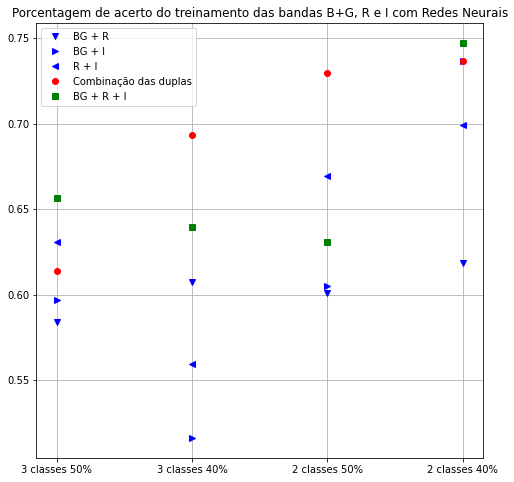

In [118]:
plt.figure(figsize=(8,8))

plt.plot("3 classes 50%",precisao1_3classes_50,'bv',label='BG + R')
plt.plot("3 classes 50%",precisao2_3classes_50,'b>',label='BG + I')
plt.plot("3 classes 50%",precisao3_3classes_50,'b<',label='R + I')
plt.plot("3 classes 50%",precisaogeral_3classes_50,'ro',label='Combinação das duplas')
plt.plot("3 classes 50%",precisao4_3classes_50,'gs',label='BG + R + I')

plt.plot("3 classes 40%",precisao1_3classes_40,'bv')
plt.plot("3 classes 40%",precisao2_3classes_40,'b>')
plt.plot("3 classes 40%",precisao3_3classes_40,'b<')
plt.plot("3 classes 40%",precisaogeral_3classes_40,'ro')
plt.plot("3 classes 40%",precisao4_3classes_40,'gs')

plt.plot("2 classes 50%",precisao1_2classes_50,'bv')
plt.plot("2 classes 50%",precisao2_2classes_50,'b>')
plt.plot("2 classes 50%",precisao3_2classes_50,'b<')
plt.plot("2 classes 50%",precisaogeral_2classes_50,'ro')
plt.plot("2 classes 50%",precisao4_2classes_50,'gs')

plt.plot("2 classes 40%",precisao1_2classes_40,'bv')
plt.plot("2 classes 40%",precisao2_2classes_40,'b>')
plt.plot("2 classes 40%",precisao3_2classes_40,'b<')
plt.plot("2 classes 40%",precisaogeral_2classes_40,'ro')
plt.plot("2 classes 40%",precisao4_2classes_40,'gs')

plt.title("Porcentagem de acerto do treinamento das bandas B+G, R e I com Redes Neurais")
plt.grid()
plt.legend(ncol=1)
plt.savefig("bandas_BG_R_I.png")
plt.show()